In [90]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.datasets import load_wine
from sklearn.metrics import silhouette_score,adjusted_rand_score
from sklearn.decomposition import PCA

In [12]:
wine = load_wine()

In [ ]:
wine()

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [25]:
df_1 = pd.DataFrame(wine.data,columns=wine.feature_names)
df_2 = pd.DataFrame(wine.target,columns=["label"])
df = pd.concat([df_1,df_2],axis=1)

In [51]:
df.head()

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  label  
0                          3.92   1065.0      0  
1                          3.40   1050.0      0  
2                          3.17   1185.0      0  
3                          3.45   1480.0      0  
4                          2.93    735.0      0

In [52]:
df["label"].value_counts()

1    71
0    59
2    48
Name: label, dtype: int64

In [27]:
df.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
label                           0
dtype: int64

In [28]:
df.duplicated().sum()

0

<Figure size 2000x1000 with 0 Axes>

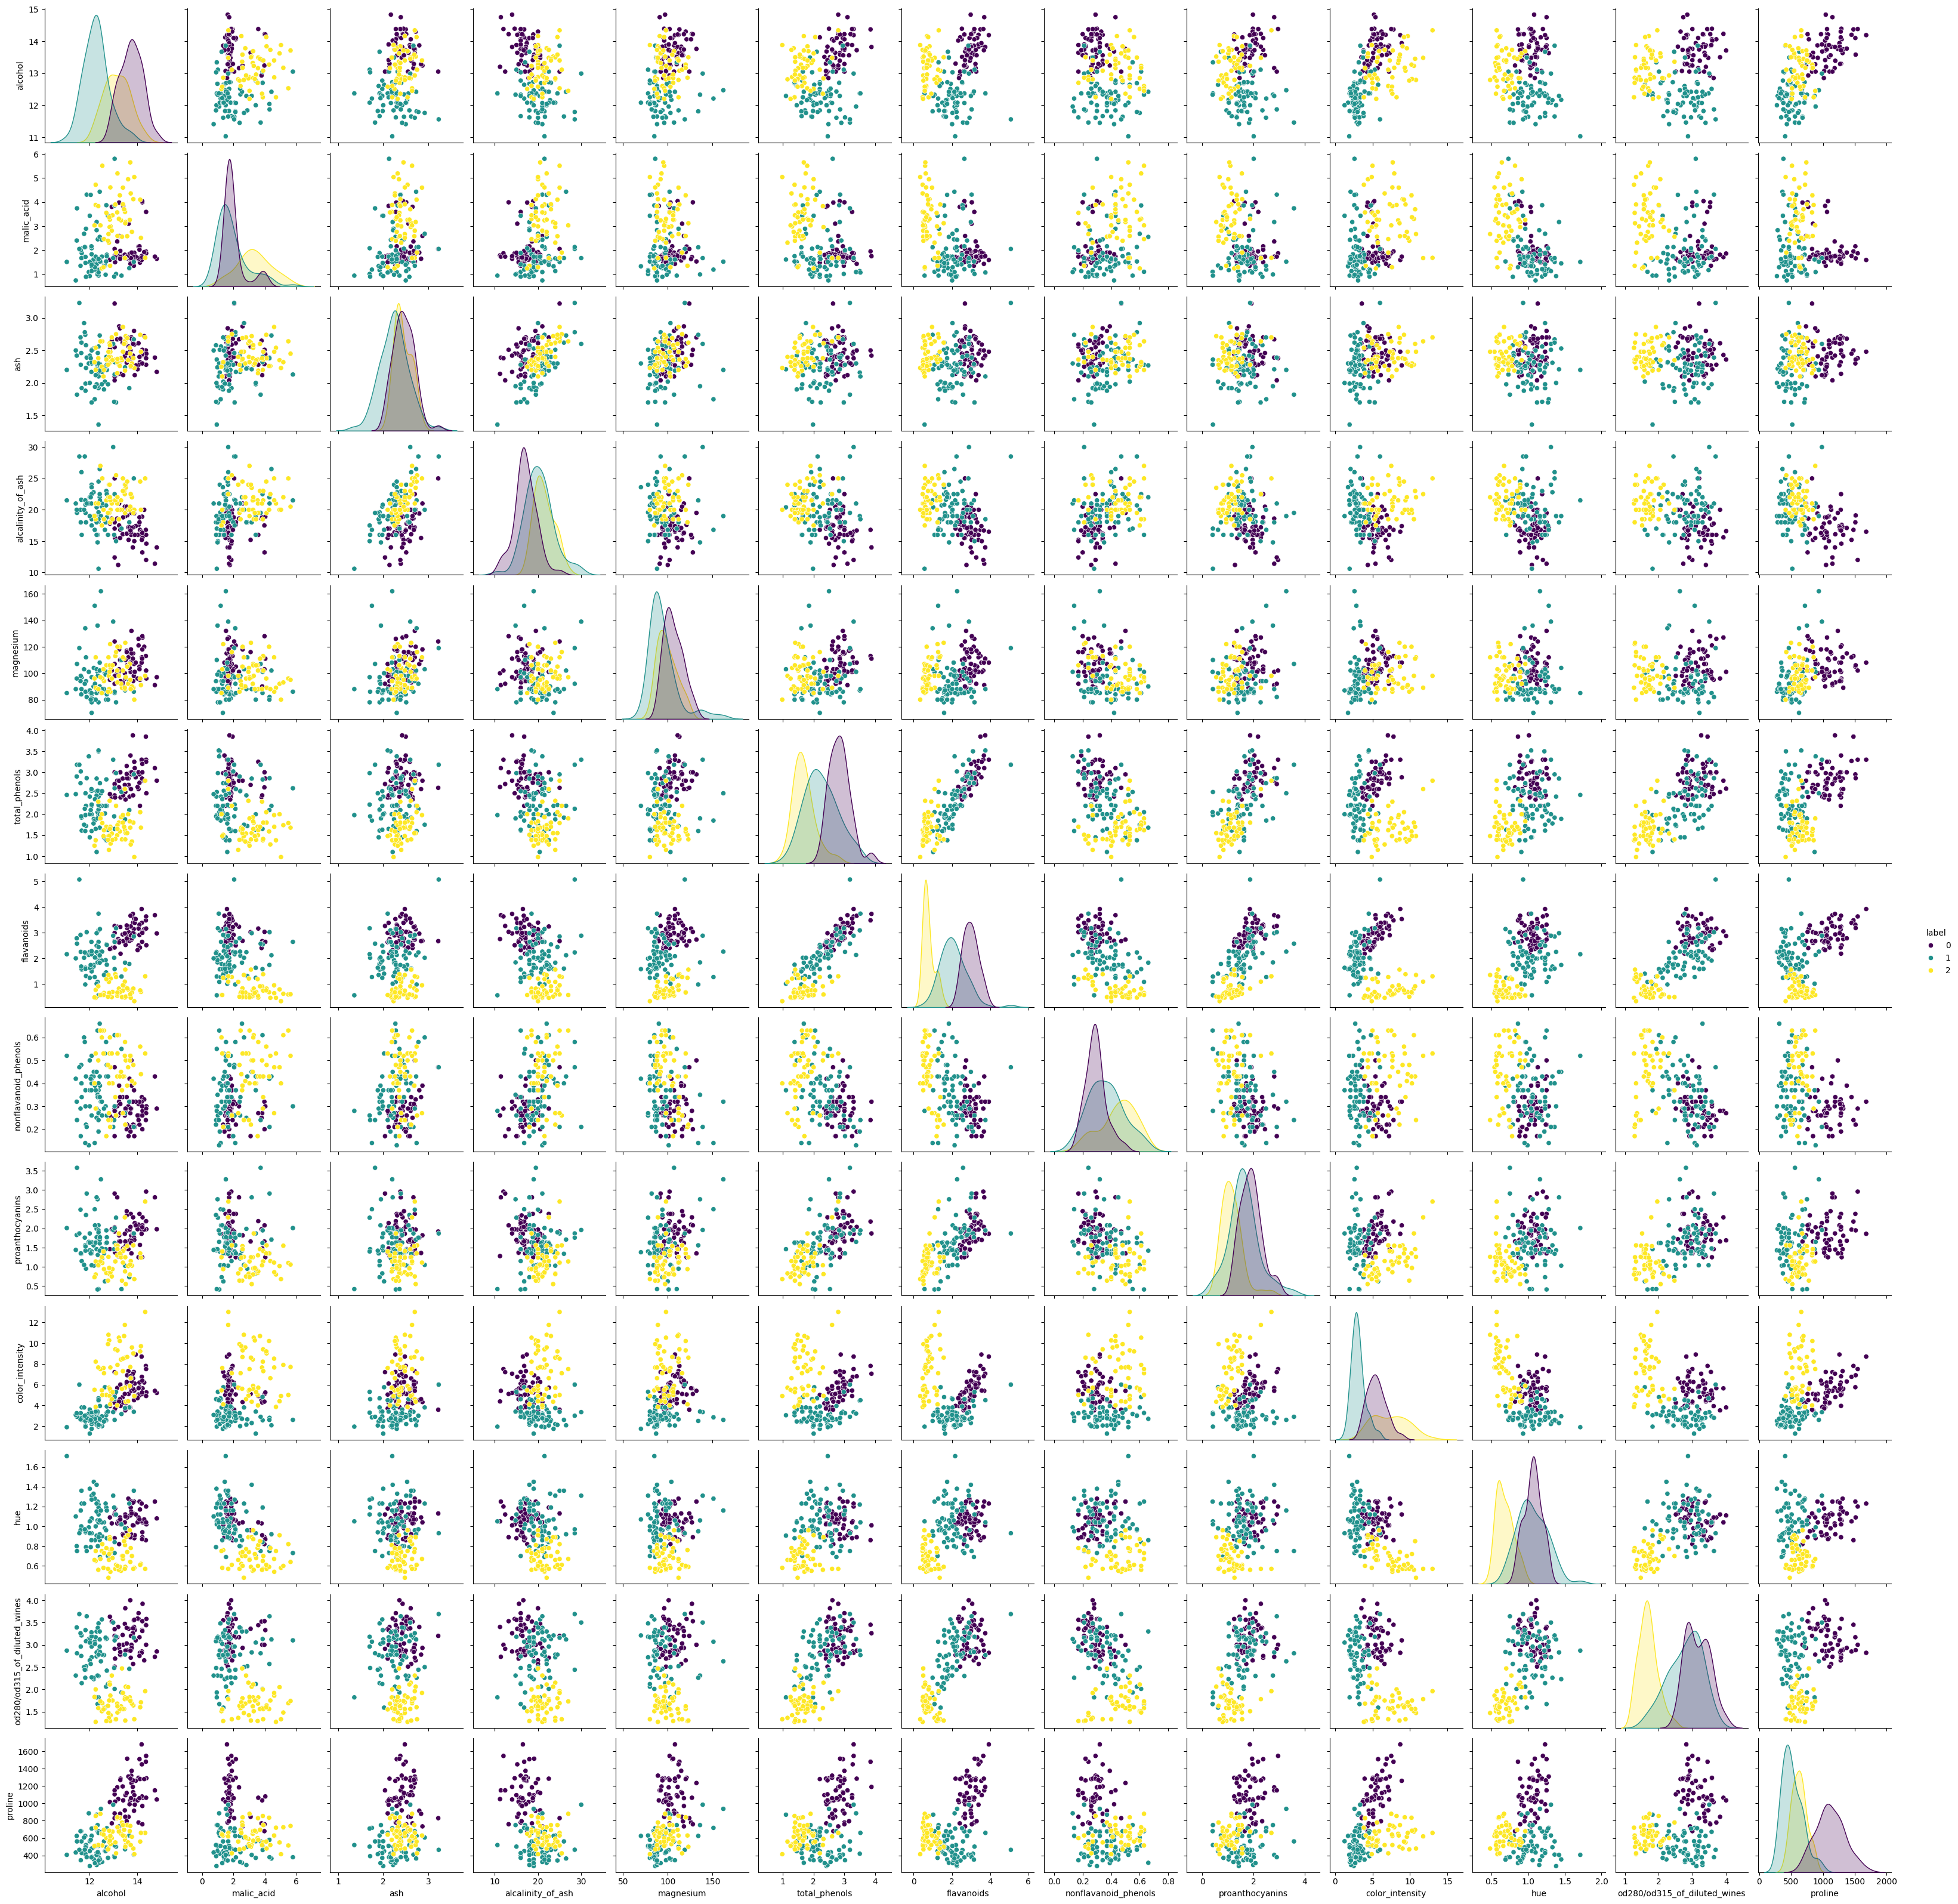

In [31]:
plt.figure(figsize=(20,10))
sns.pairplot(df,palette="viridis",hue="label")

In [34]:
df_1

alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0          3.06                  0.28             2.29             5.64  1.04   
1          2.76                  0.26             1.28             4.38  1.05   
2          3.24                  0.30             2.81             5.68  1.03   
3          3.49                  0.24             2.18             7.80  0.86   
4          2.69                  0.39             1.82             4.32  1.04   
..          ...                   ...              ...              ...   ...   
173        0.61                  0.52             1.06             7.70  0.64   
174        0.75                  0.43             1.41             7.30  0.70   
175        0.69                  0.43             1.35            10.20  0.59   
176        0.68                  0.53             1.46             9.30  0.60   
177        0.76                  0.56             1.35             9.20  0.61   

     od280/od315_of_diluted_wines  proline  
0                            3.92   1065.0  
1                            3.40   1050.0  
2                            3.17   1185.0  
3                            3.45   1480.0  
4                            2.93    735.0  
..                            ...      ...  
173                          1.74    740.0  
174                          1.56    750.0  
175                          1.56    835.0  
176                          1.62    840.0  
177                          1.60    560.0  

[178 rows x 13 columns]

In [36]:
wcss = []
for i in range(1,50):
    kmeans = KMeans(n_clusters=i,random_state=42)
    kmeans.fit(df_1)
    wcss.append(kmeans.inertia_)

In [37]:
wcss

[17592296.383508474,
 4543749.614531862,
 2633555.3324093386,
 1351749.369142808,
 965019.0873703663,
 684050.7480527543,
 414997.5629249221,
 347293.48953935836,
 290111.64183758595,
 237728.9703008799,
 208902.90160695233,
 170505.56768852792,
 150322.70167066655,
 123439.25412066653,
 112006.74061566655,
 103811.91987830392,
 95714.50380830391,
 83014.54523806213,
 79330.09786709861,
 73138.12789677831,
 67361.6685598823,
 61893.86904845372,
 58826.25039178706,
 56871.83469612354,
 54639.98278810564,
 51530.64581951591,
 49969.92055633408,
 47803.27309244519,
 45734.84739244518,
 41476.404092445184,
 39264.49183178863,
 37730.89524997045,
 34466.33485892621,
 33069.20245483169,
 31718.89191149836,
 30206.951193998357,
 28517.68375542693,
 27708.930623482483,
 25608.476543641213,
 25145.674074593593,
 24201.63427358349,
 22209.03497666921,
 21377.020626669208,
 20989.96680166921,
 19768.11468500254,
 18948.762760002544,
 18431.816421907304,
 17546.81398945111,
 17094.050689451113]

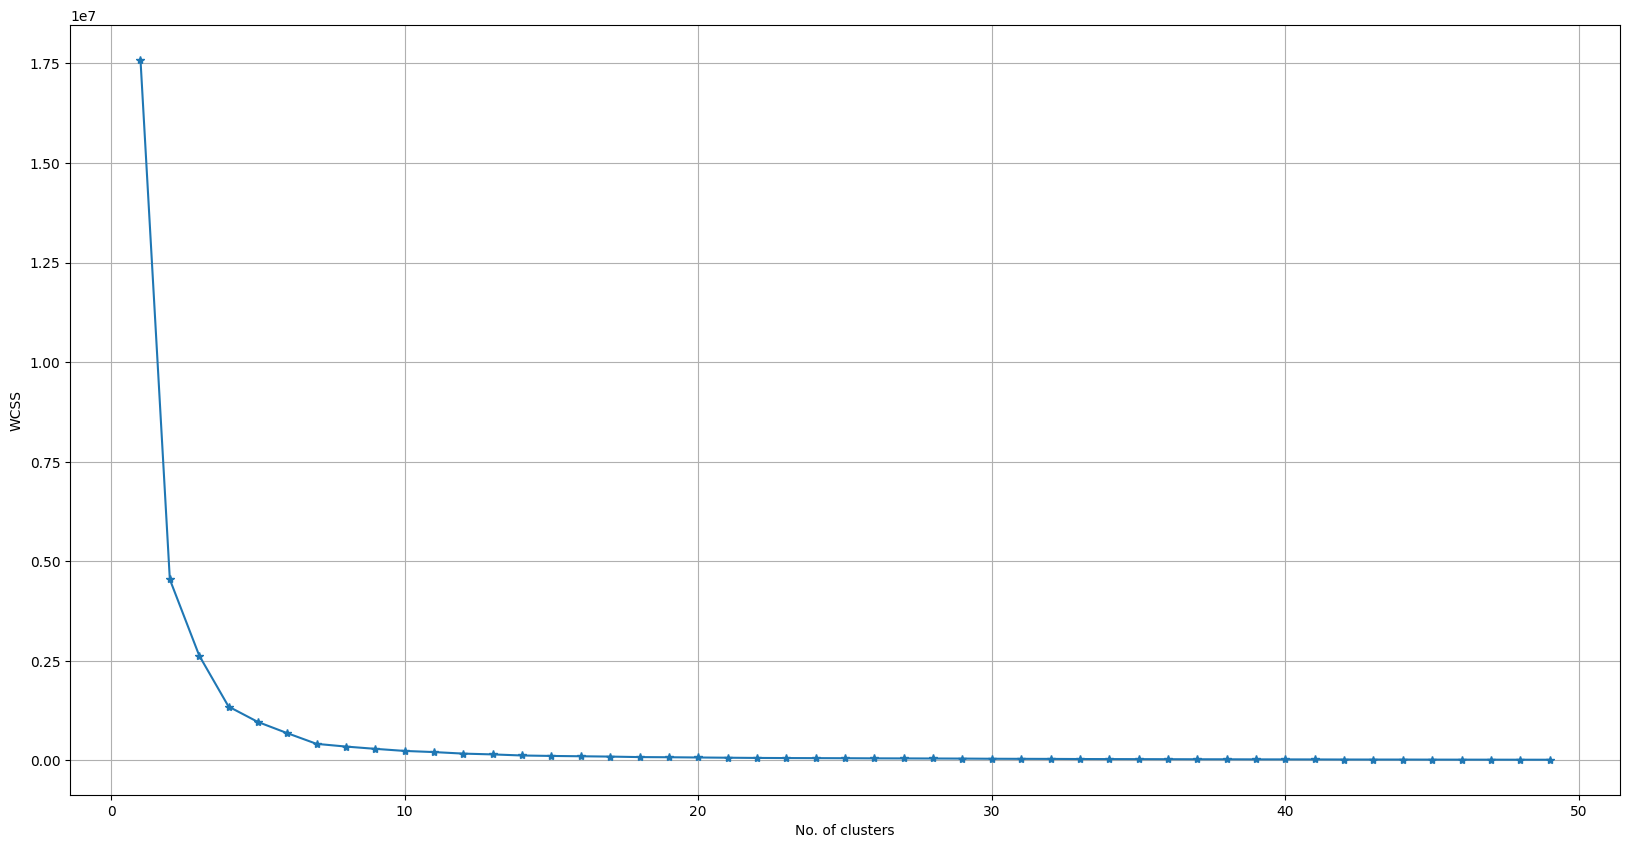

In [42]:
plt.figure(figsize=(20,10))
plt.plot([i for i in range(1,50)],wcss,marker="*")
plt.xlabel("No. of clusters")
plt.ylabel("WCSS")
plt.grid(True)

In [45]:
kmeans_ = KMeans(n_clusters=3,random_state=42)
kmeans_pred = kmeans_.fit_predict(df_1)


In [46]:
sil_score = silhouette_score(df_1,kmeans_pred)

In [47]:
sil_score

0.5595823478987213

In [48]:
kmeans4_ = KMeans(n_clusters=4,random_state=42)
kmeans_pred_ = kmeans4_.fit_predict(df_1)


In [49]:
sil_score_4 = silhouette_score(df_1,kmeans_pred_)

In [50]:
sil_score_4

0.566947772359962

In [53]:
kmeans5_ = KMeans(n_clusters=5,random_state=42)
kmeans_pred_5 = kmeans5_.fit_predict(df_1)


In [54]:
sil_score_5 = silhouette_score(df_1,kmeans_pred_5)

In [55]:
sil_score_5

0.5081797474674721

In [56]:
# now , lets use pca 

In [107]:
pca_ = PCA(n_components=2)
df_1_pca = pca_.fit_transform(df_1)

In [108]:
df_1_pca

array([[ 3.18562979e+02,  2.14921307e+01],
       [ 3.03097420e+02, -5.36471768e+00],
       [ 4.38061133e+02, -6.53730945e+00],
       [ 7.33240139e+02,  1.92729032e-01],
       [-1.15714285e+01,  1.84899946e+01],
       [ 7.03231192e+02, -3.32158674e-01],
       [ 5.42971581e+02, -1.35189666e+01],
       [ 5.48401860e+02,  1.14494324e+01],
       [ 2.98036863e+02, -8.18015784e+00],
       [ 2.98049553e+02, -7.10154294e+00],
       [ 7.63079712e+02, -8.33431723e+00],
       [ 5.32943228e+02, -1.42876338e+01],
       [ 5.72834410e+02, -2.10050143e+01],
       [ 4.02925358e+02, -1.61026352e+01],
       [ 8.00053394e+02, -1.21184472e+01],
       [ 5.63245578e+02,  2.21482866e+00],
       [ 5.33379651e+02,  1.08048022e+01],
       [ 3.83317591e+02,  8.47741982e+00],
       [ 9.33118387e+02, -8.35447844e+00],
       [ 9.84031775e+01,  1.43926594e+01],
       [ 3.35935940e+01,  2.55679565e+01],
       [ 2.31464375e+01,  1.81747309e+00],
       [ 2.88093030e+02, -3.96304175e+00],
       [ 2.

In [109]:
# df_1_pca[:,0]

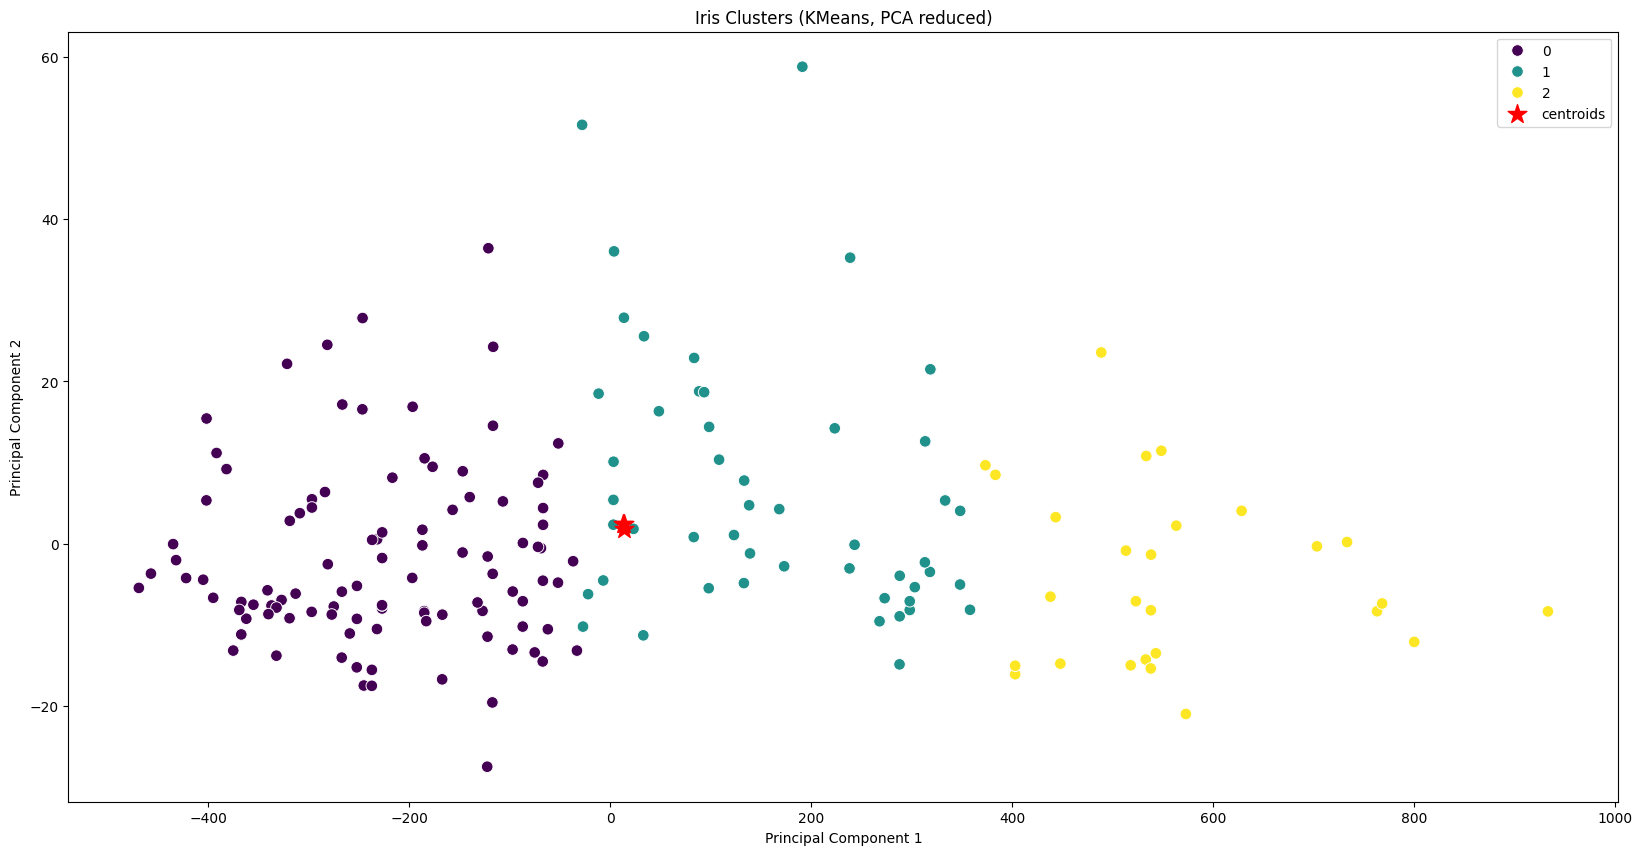

In [110]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df_1_pca[:,0],y=df_1_pca[:,1],hue=kmeans_pred,palette="viridis",s=70)
plt.scatter(kmeans_.cluster_centers_[:,0],kmeans_.cluster_centers_[:,1],c="red",s=200,marker="*",label="centroids")
plt.title("Iris Clusters (KMeans, PCA reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()


In [111]:
df_2

label
0        0
1        0
2        0
3        0
4        0
..     ...
173      2
174      2
175      2
176      2
177      2

[178 rows x 1 columns]

In [112]:
ad_rand_score = adjusted_rand_score(df_2.values.ravel(),kmeans_pred)

In [113]:
ad_rand_score

0.3517721516862617